In [1]:
import scorecardpy as sc
import warnings
import pandas as pd

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.float_format', lambda x: '%.5f' %x)

%matplotlib inline

In [2]:
# load germancredit data
dat = sc.germancredit()

In [3]:
dat.head()

,status.of.existing.checking.account,duration.in.month,credit.history,purpose,credit.amount,savings.account.and.bonds,present.employment.since,installment.rate.in.percentage.of.disposable.income,personal.status.and.sex,other.debtors.or.guarantors,present.residence.since,property,age.in.years,other.installment.plans,housing,number.of.existing.credits.at.this.bank,job,number.of.people.being.liable.to.provide.maintenance.for,telephone,foreign.worker,creditability
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,... >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,good
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,bad
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,good
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,none,yes,good
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,bad


In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
status.of.existing.checking.account                         1000 non-null category
duration.in.month                                           1000 non-null int64
credit.history                                              1000 non-null category
purpose                                                     1000 non-null object
credit.amount                                               1000 non-null int64
savings.account.and.bonds                                   1000 non-null category
present.employment.since                                    1000 non-null category
installment.rate.in.percentage.of.disposable.income         1000 non-null int64
personal.status.and.sex                                     1000 non-null category
other.debtors.or.guarantors                                 1000 non-null category
present.residence.since                                     1000 non-null i

In [5]:
# filter variable via missing rate, iv, identical value rate
dt_s = sc.var_filter(dat, y="creditability")

[INFO] filtering variables ...


In [6]:
dt_s.head()

,present.employment.since,other.debtors.or.guarantors,credit.amount,savings.account.and.bonds,personal.status.and.sex,other.installment.plans,purpose,status.of.existing.checking.account,age.in.years,credit.history,housing,installment.rate.in.percentage.of.disposable.income,property,duration.in.month,creditability
0,... >= 7 years,none,1169,unknown/ no savings account,male : single,none,radio/television,... < 0 DM,67,critical account/ other credits existing (not ...,own,4,real estate,6,0
1,1 <= ... < 4 years,none,5951,... < 100 DM,female : divorced/separated/married,none,radio/television,0 <= ... < 200 DM,22,existing credits paid back duly till now,own,2,real estate,48,1
2,4 <= ... < 7 years,none,2096,... < 100 DM,male : single,none,education,no checking account,49,critical account/ other credits existing (not ...,own,2,real estate,12,0
3,4 <= ... < 7 years,guarantor,7882,... < 100 DM,male : single,none,furniture/equipment,... < 0 DM,45,existing credits paid back duly till now,for free,2,building society savings agreement/ life insur...,42,0
4,1 <= ... < 4 years,none,4870,... < 100 DM,male : single,none,car (new),... < 0 DM,53,delay in paying off in the past,for free,3,unknown / no property,24,1


In [7]:
dt_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
present.employment.since                               1000 non-null category
other.debtors.or.guarantors                            1000 non-null category
credit.amount                                          1000 non-null int64
savings.account.and.bonds                              1000 non-null category
personal.status.and.sex                                1000 non-null category
other.installment.plans                                1000 non-null category
purpose                                                1000 non-null object
status.of.existing.checking.account                    1000 non-null category
age.in.years                                           1000 non-null int64
credit.history                                         1000 non-null category
housing                                                1000 non-null category
installment.rate.in.percentage.of.disposable

In [8]:
# breaking dt into train and test
train, test = sc.split_df(dt_s, 'creditability').values() 

In [9]:
train.head()

,present.employment.since,other.debtors.or.guarantors,credit.amount,savings.account.and.bonds,personal.status.and.sex,other.installment.plans,purpose,status.of.existing.checking.account,age.in.years,credit.history,housing,installment.rate.in.percentage.of.disposable.income,property,duration.in.month,creditability
0,... >= 7 years,none,1169,unknown/ no savings account,male : single,none,radio/television,... < 0 DM,67,critical account/ other credits existing (not ...,own,4,real estate,6,0
2,4 <= ... < 7 years,none,2096,... < 100 DM,male : single,none,education,no checking account,49,critical account/ other credits existing (not ...,own,2,real estate,12,0
4,1 <= ... < 4 years,none,4870,... < 100 DM,male : single,none,car (new),... < 0 DM,53,delay in paying off in the past,for free,3,unknown / no property,24,1
5,1 <= ... < 4 years,none,9055,unknown/ no savings account,male : single,none,education,no checking account,35,existing credits paid back duly till now,for free,2,unknown / no property,36,0
6,... >= 7 years,none,2835,500 <= ... < 1000 DM,male : single,none,furniture/equipment,no checking account,53,existing credits paid back duly till now,own,3,building society savings agreement/ life insur...,24,0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 999
Data columns (total 15 columns):
present.employment.since                               700 non-null category
other.debtors.or.guarantors                            700 non-null category
credit.amount                                          700 non-null int64
savings.account.and.bonds                              700 non-null category
personal.status.and.sex                                700 non-null category
other.installment.plans                                700 non-null category
purpose                                                700 non-null object
status.of.existing.checking.account                    700 non-null category
age.in.years                                           700 non-null int64
credit.history                                         700 non-null category
housing                                                700 non-null category
installment.rate.in.percentage.of.disposable.income    7

In [11]:
test.head()

,present.employment.since,other.debtors.or.guarantors,credit.amount,savings.account.and.bonds,personal.status.and.sex,other.installment.plans,purpose,status.of.existing.checking.account,age.in.years,credit.history,housing,installment.rate.in.percentage.of.disposable.income,property,duration.in.month,creditability
1,1 <= ... < 4 years,none,5951,... < 100 DM,female : divorced/separated/married,none,radio/television,0 <= ... < 200 DM,22,existing credits paid back duly till now,own,2,real estate,48,1
3,4 <= ... < 7 years,guarantor,7882,... < 100 DM,male : single,none,furniture/equipment,... < 0 DM,45,existing credits paid back duly till now,for free,2,building society savings agreement/ life insur...,42,0
9,unemployed,none,5234,... < 100 DM,male : married/widowed,none,car (new),0 <= ... < 200 DM,28,critical account/ other credits existing (not ...,own,4,"car or other, not in attribute Savings account...",30,1
10,... < 1 year,none,1295,... < 100 DM,female : divorced/separated/married,none,car (new),0 <= ... < 200 DM,25,existing credits paid back duly till now,rent,3,"car or other, not in attribute Savings account...",12,1
12,1 <= ... < 4 years,none,1567,... < 100 DM,female : divorced/separated/married,none,radio/television,0 <= ... < 200 DM,22,existing credits paid back duly till now,own,1,"car or other, not in attribute Savings account...",12,0


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 1 to 994
Data columns (total 15 columns):
present.employment.since                               300 non-null category
other.debtors.or.guarantors                            300 non-null category
credit.amount                                          300 non-null int64
savings.account.and.bonds                              300 non-null category
personal.status.and.sex                                300 non-null category
other.installment.plans                                300 non-null category
purpose                                                300 non-null object
status.of.existing.checking.account                    300 non-null category
age.in.years                                           300 non-null int64
credit.history                                         300 non-null category
housing                                                300 non-null category
installment.rate.in.percentage.of.disposable.income    3

[INFO] creating woe binning ...


{'housing': <Figure size 432x288 with 2 Axes>,
 'present.employment.since': <Figure size 432x288 with 2 Axes>,
 'other.debtors.or.guarantors': <Figure size 432x288 with 2 Axes>,
 'installment.rate.in.percentage.of.disposable.income': <Figure size 432x288 with 2 Axes>,
 'credit.amount': <Figure size 432x288 with 2 Axes>,
 'savings.account.and.bonds': <Figure size 432x288 with 2 Axes>,
 'property': <Figure size 432x288 with 2 Axes>,
 'personal.status.and.sex': <Figure size 432x288 with 2 Axes>,
 'other.installment.plans': <Figure size 432x288 with 2 Axes>,
 'purpose': <Figure size 432x288 with 2 Axes>,
 'status.of.existing.checking.account': <Figure size 432x288 with 2 Axes>,
 'age.in.years': <Figure size 432x288 with 2 Axes>,
 'credit.history': <Figure size 432x288 with 2 Axes>,
 'duration.in.month': <Figure size 432x288 with 2 Axes>}

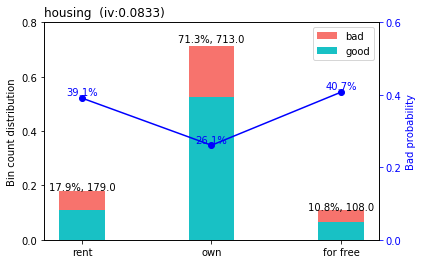

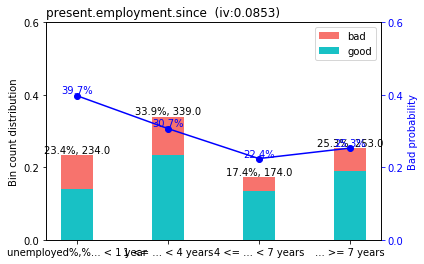

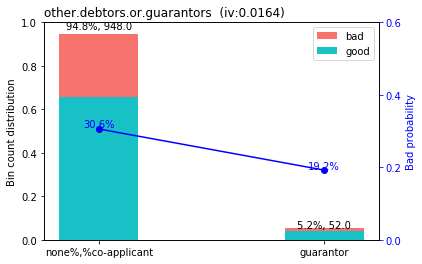

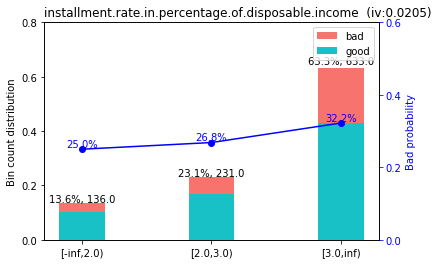

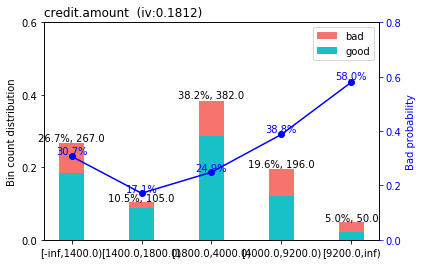

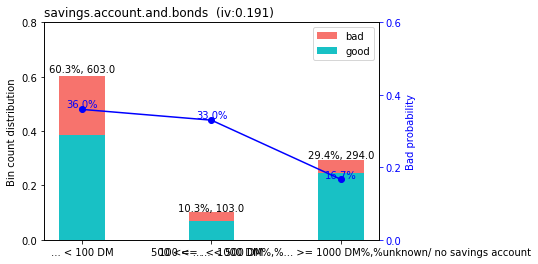

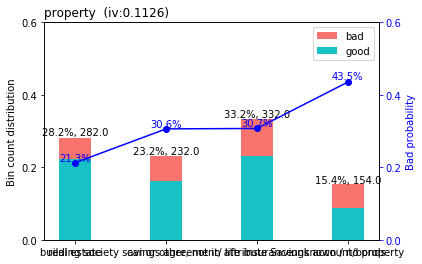

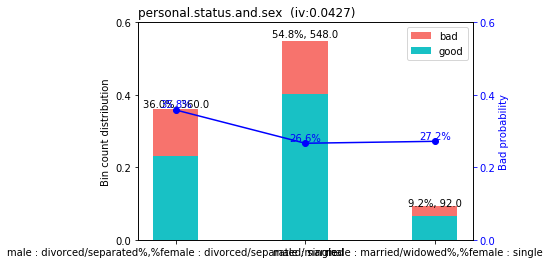

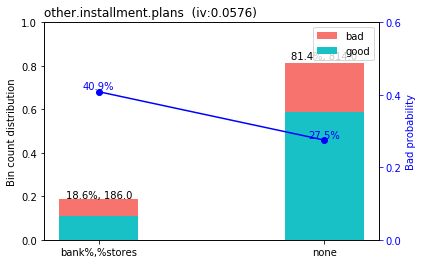

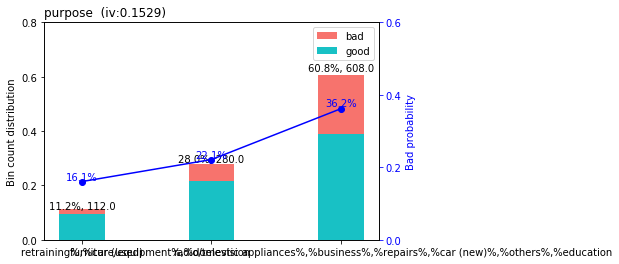

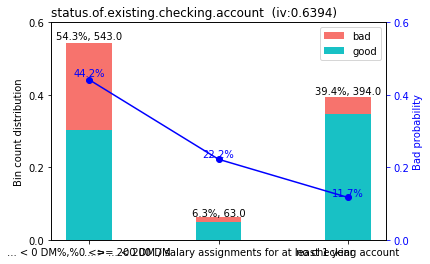

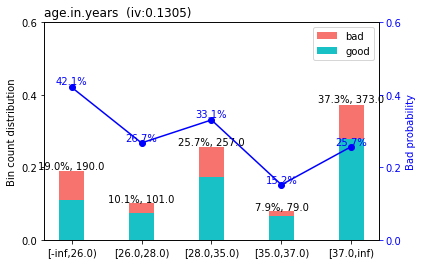

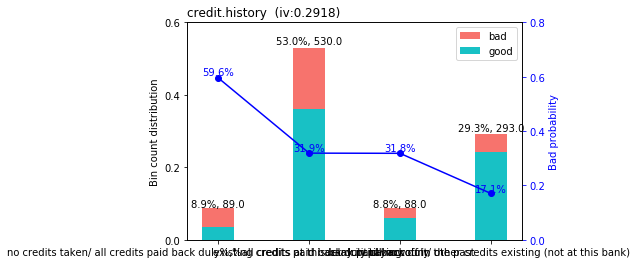

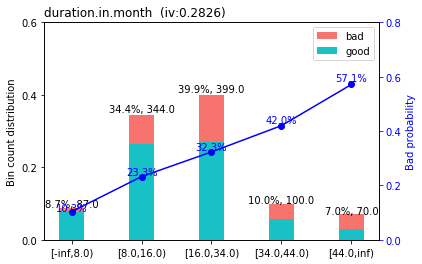

In [13]:
# woe binning ------
bins = sc.woebin(dt_s, y="creditability")
sc.woebin_plot(bins)

In [14]:
result = pd.DataFrame()
for i, j in bins.items():
    if i != 'index':
        result = result.append(j)

In [15]:
result

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,housing,rent,179.00000,0.17900,109.00000,70.00000,0.39106,0.40445,0.03139,0.08329,rent,False
1,housing,own,713.00000,0.71300,527.00000,186.00000,0.26087,-0.19416,0.02580,0.08329,own,False
2,housing,for free,108.00000,0.10800,64.00000,44.00000,0.40741,0.47260,0.02611,0.08329,for free,False
0,present.employment.since,"unemployed%,%... < 1 year",234.00000,0.23400,141.00000,93.00000,0.39744,0.43114,0.04681,0.08530,"unemployed%,%... < 1 year",False
1,present.employment.since,1 <= ... < 4 years,339.00000,0.33900,235.00000,104.00000,0.30678,0.03210,0.00035,0.08530,1 <= ... < 4 years,False
2,present.employment.since,4 <= ... < 7 years,174.00000,0.17400,135.00000,39.00000,0.22414,-0.39442,0.02479,0.08530,4 <= ... < 7 years,False
3,present.employment.since,... >= 7 years,253.00000,0.25300,189.00000,64.00000,0.25296,-0.23557,0.01335,0.08530,... >= 7 years,False
0,other.debtors.or.guarantors,"none%,%co-applicant",948.00000,0.94800,658.00000,290.00000,0.30591,0.02797,0.00075,0.01642,"none%,%co-applicant",False
1,other.debtors.or.guarantors,guarantor,52.00000,0.05200,42.00000,10.00000,0.19231,-0.58779,0.01567,0.01642,guarantor,False
0,installment.rate.in.percentage.of.disposable.i...,"[-inf,2.0)",136.00000,0.13600,102.00000,34.00000,0.25000,-0.25131,0.00814,0.02052,2.0,False


In [16]:
# binning adjustment
# # adjust breaks interactively
# breaks_adj = sc.woebin_adj(dt_s, "creditability", bins) 
# # or specify breaks manually
breaks_adj = {
    'age.in.years': [26, 35, 40],
    'other.debtors.or.guarantors': ["none", "co-applicant%,%guarantor"]
}
bins_adj = sc.woebin(dt_s, y="creditability", breaks_list=breaks_adj)

[INFO] creating woe binning ...


In [17]:
result1 = pd.DataFrame()
for i, j in bins_adj.items():
    if i != 'index':
        result1 = result1.append(j)

In [18]:
result1

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,housing,rent,179.00000,0.17900,109.00000,70.00000,0.39106,0.40445,0.03139,0.08329,rent,False
1,housing,own,713.00000,0.71300,527.00000,186.00000,0.26087,-0.19416,0.02580,0.08329,own,False
2,housing,for free,108.00000,0.10800,64.00000,44.00000,0.40741,0.47260,0.02611,0.08329,for free,False
0,present.employment.since,"unemployed%,%... < 1 year",234.00000,0.23400,141.00000,93.00000,0.39744,0.43114,0.04681,0.08530,"unemployed%,%... < 1 year",False
1,present.employment.since,1 <= ... < 4 years,339.00000,0.33900,235.00000,104.00000,0.30678,0.03210,0.00035,0.08530,1 <= ... < 4 years,False
2,present.employment.since,4 <= ... < 7 years,174.00000,0.17400,135.00000,39.00000,0.22414,-0.39442,0.02479,0.08530,4 <= ... < 7 years,False
3,present.employment.since,... >= 7 years,253.00000,0.25300,189.00000,64.00000,0.25296,-0.23557,0.01335,0.08530,... >= 7 years,False
0,other.debtors.or.guarantors,none,907.00000,0.90700,635.00000,272.00000,0.29989,-0.00053,0.00000,0.00000,none,False
1,other.debtors.or.guarantors,"co-applicant%,%guarantor",93.00000,0.09300,65.00000,28.00000,0.30108,0.00512,0.00000,0.00000,"co-applicant%,%guarantor",False
0,installment.rate.in.percentage.of.disposable.i...,"[-inf,2.0)",136.00000,0.13600,102.00000,34.00000,0.25000,-0.25131,0.00814,0.02052,2.0,False


{'housing': <Figure size 432x288 with 2 Axes>,
 'present.employment.since': <Figure size 432x288 with 2 Axes>,
 'other.debtors.or.guarantors': <Figure size 432x288 with 2 Axes>,
 'installment.rate.in.percentage.of.disposable.income': <Figure size 432x288 with 2 Axes>,
 'credit.amount': <Figure size 432x288 with 2 Axes>,
 'savings.account.and.bonds': <Figure size 432x288 with 2 Axes>,
 'property': <Figure size 432x288 with 2 Axes>,
 'personal.status.and.sex': <Figure size 432x288 with 2 Axes>,
 'other.installment.plans': <Figure size 432x288 with 2 Axes>,
 'purpose': <Figure size 432x288 with 2 Axes>,
 'status.of.existing.checking.account': <Figure size 432x288 with 2 Axes>,
 'age.in.years': <Figure size 432x288 with 2 Axes>,
 'credit.history': <Figure size 432x288 with 2 Axes>,
 'duration.in.month': <Figure size 432x288 with 2 Axes>}

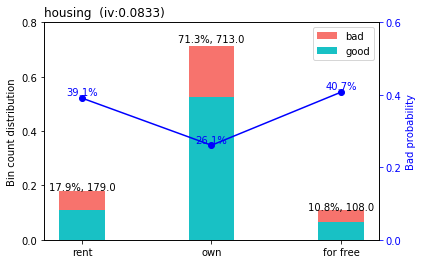

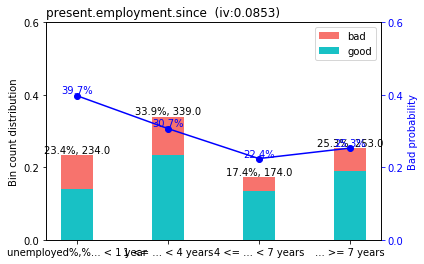

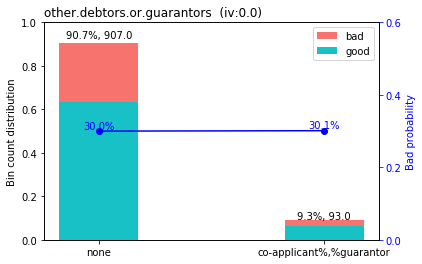

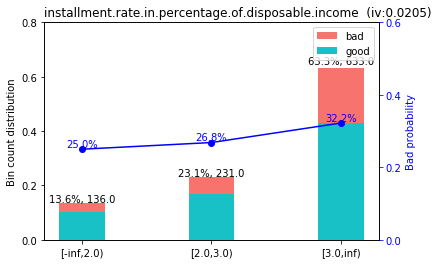

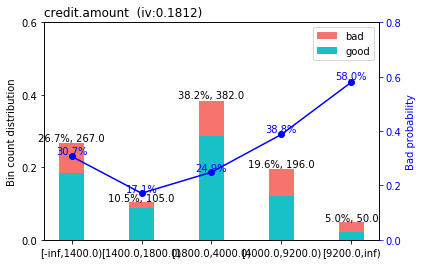

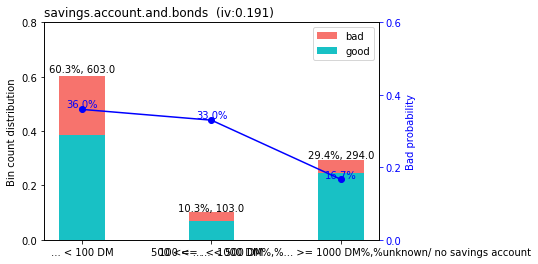

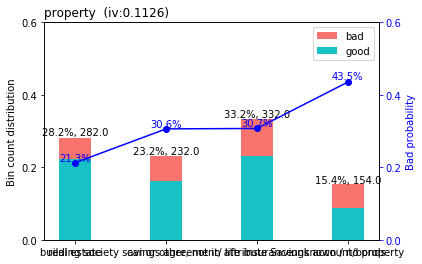

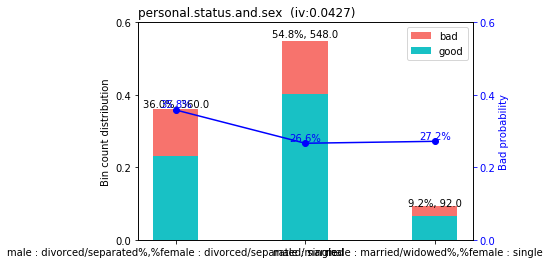

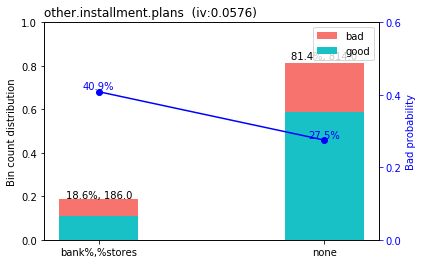

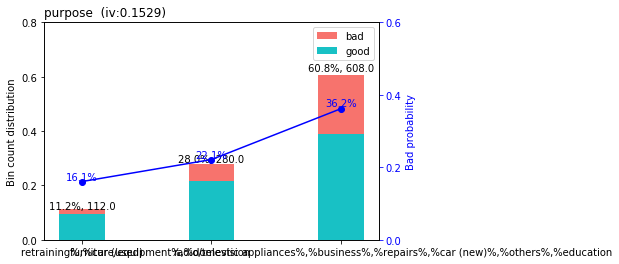

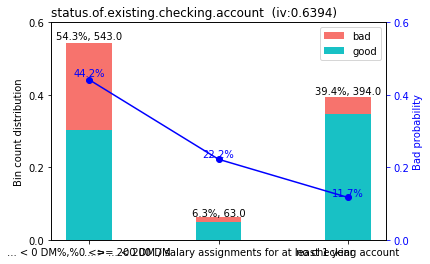

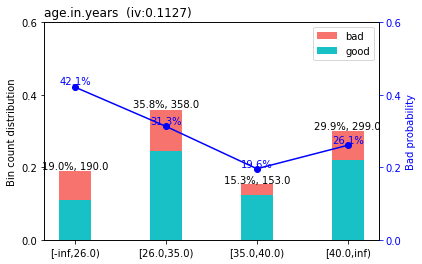

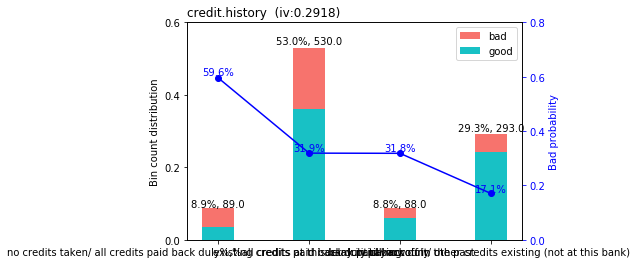

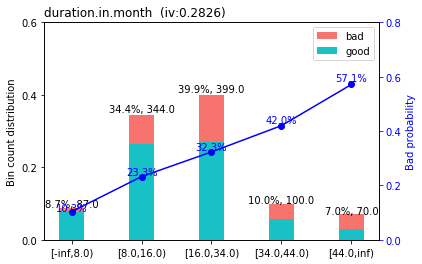

In [19]:
sc.woebin_plot(bins_adj)

In [20]:
# converting train and test into woe values
train_woe = sc.woebin_ply(train, bins_adj)
test_woe = sc.woebin_ply(test, bins_adj)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [21]:
train_woe.head()

,creditability,housing_woe,present.employment.since_woe,other.debtors.or.guarantors_woe,installment.rate.in.percentage.of.disposable.income_woe,credit.amount_woe,savings.account.and.bonds_woe,property_woe,personal.status.and.sex_woe,other.installment.plans_woe,purpose_woe,status.of.existing.checking.account_woe,age.in.years_woe,credit.history_woe,duration.in.month_woe
0,0,-0.19416,-0.23557,-0.00053,0.10396,0.03366,-0.76214,-0.46103,-0.16555,-0.12118,-0.41006,0.61420,-0.19416,-0.73374,-1.31219
2,0,-0.19416,-0.39442,-0.00053,-0.15547,-0.25831,0.27136,-0.46103,-0.16555,-0.12118,0.27992,-1.17626,-0.19416,-0.73374,-0.34662
4,1,0.47260,0.03210,-0.00053,0.10396,0.39054,0.27136,0.58608,-0.16555,-0.12118,0.27992,0.61420,-0.19416,0.08516,0.10869
5,0,0.47260,0.03210,-0.00053,-0.15547,0.39054,-0.76214,0.58608,-0.16555,-0.12118,0.27992,-1.17626,-0.56369,0.08832,0.52452
6,0,-0.19416,-0.23557,-0.00053,0.10396,-0.25831,-0.76214,0.02857,-0.16555,-0.12118,0.27992,-1.17626,-0.19416,0.08832,0.10869


In [22]:
train_woe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 999
Data columns (total 15 columns):
creditability                                              700 non-null int64
housing_woe                                                700 non-null float64
present.employment.since_woe                               700 non-null float64
other.debtors.or.guarantors_woe                            700 non-null float64
installment.rate.in.percentage.of.disposable.income_woe    700 non-null float64
credit.amount_woe                                          700 non-null float64
savings.account.and.bonds_woe                              700 non-null float64
property_woe                                               700 non-null float64
personal.status.and.sex_woe                                700 non-null float64
other.installment.plans_woe                                700 non-null float64
purpose_woe                                                700 non-null float64
status.of.existin

In [23]:
test_woe.head()

,creditability,housing_woe,present.employment.since_woe,other.debtors.or.guarantors_woe,installment.rate.in.percentage.of.disposable.income_woe,credit.amount_woe,savings.account.and.bonds_woe,property_woe,personal.status.and.sex_woe,other.installment.plans_woe,purpose_woe,status.of.existing.checking.account_woe,age.in.years_woe,credit.history_woe,duration.in.month_woe
1,1,-0.19416,0.03210,-0.00053,-0.15547,0.39054,0.27136,-0.46103,0.26469,-0.12118,-0.41006,0.61420,0.52884,0.08832,1.13498
3,0,0.47260,-0.39442,0.00512,-0.15547,0.39054,0.27136,0.02857,-0.16555,-0.12118,0.27992,0.61420,-0.19416,0.08832,0.52452
9,1,-0.19416,0.43114,-0.00053,0.10396,0.39054,0.27136,0.03419,-0.13852,-0.12118,0.27992,0.61420,0.06047,-0.73374,0.10869
10,1,0.40445,0.43114,-0.00053,0.10396,0.03366,0.27136,0.03419,0.26469,-0.12118,0.27992,0.61420,0.52884,0.08832,-0.34662
12,0,-0.19416,0.03210,-0.00053,-0.25131,-0.72824,0.27136,0.03419,0.26469,-0.12118,-0.41006,0.61420,0.52884,0.08832,-0.34662


In [24]:
test_woe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 1 to 994
Data columns (total 15 columns):
creditability                                              300 non-null int64
housing_woe                                                300 non-null float64
present.employment.since_woe                               300 non-null float64
other.debtors.or.guarantors_woe                            300 non-null float64
installment.rate.in.percentage.of.disposable.income_woe    300 non-null float64
credit.amount_woe                                          300 non-null float64
savings.account.and.bonds_woe                              300 non-null float64
property_woe                                               300 non-null float64
personal.status.and.sex_woe                                300 non-null float64
other.installment.plans_woe                                300 non-null float64
purpose_woe                                                300 non-null float64
status.of.existin

In [25]:
y_train = train_woe.loc[:,'creditability']
X_train = train_woe.loc[:,train_woe.columns != 'creditability']
y_test = test_woe.loc[:,'creditability']
X_test = test_woe.loc[:,train_woe.columns != 'creditability']

In [26]:
# logistic regression ------
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train, y_train)
lr.coef_

array([[0.44342611, 0.21345783, 0.        , 1.94751028, 0.84640143,
        0.5048117 , 0.28968197, 0.85917111, 0.73821172, 1.01994485,
        0.76127024, 0.69724705, 0.5747092 , 0.5537557 ]])

In [27]:
lr.intercept_

array([-0.82490663])

In [28]:
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

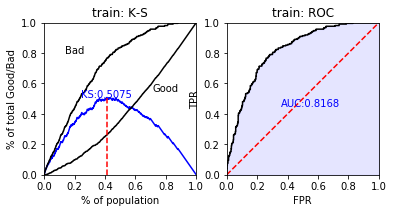

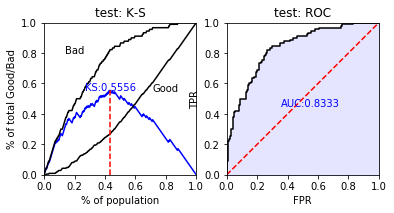

In [29]:
# performance ks & roc ------
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

In [30]:
# score ------
card = sc.scorecard(bins_adj, lr, X_train.columns)
# credit score
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

In [31]:
score = pd.DataFrame()
for i, j in card.items():
    if i != 'index':
        score = score.append(j)

In [32]:
score

,variable,bin,points
0,basepoints,NaN,447.00000
0,housing,rent,-13.00000
1,housing,own,6.00000
2,housing,for free,-15.00000
3,present.employment.since,"unemployed%,%... < 1 year",-7.00000
4,present.employment.since,1 <= ... < 4 years,-0.00000
5,present.employment.since,4 <= ... < 7 years,6.00000
6,present.employment.since,... >= 7 years,4.00000
9,installment.rate.in.percentage.of.disposable.i...,"[-inf,2.0)",35.00000
10,installment.rate.in.percentage.of.disposable.i...,"[2.0,3.0)",22.00000


In [33]:
train_score

,score
0,582.00000
2,611.00000
4,334.00000
5,509.00000
6,547.00000
7,465.00000
8,640.00000
11,236.00000
13,426.00000
14,431.00000


In [34]:
test_score

,score
1,361.00000
3,371.00000
9,379.00000
10,317.00000
12,490.00000
18,345.00000
19,585.00000
20,557.00000
28,511.00000
30,434.00000


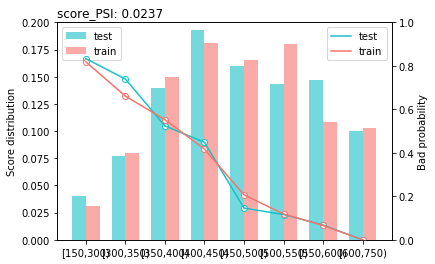

{'psi':   variable     PSI
 0    score 0.02375, 'pic': {'score': <Figure size 432x288 with 2 Axes>}}

In [35]:
# psi
sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)